### Dataset Exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train.csv', index_col='id')

In [3]:
df

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [4]:
df = df.reset_index()

In [5]:
df = df.drop(['onpromotion', 'id'], axis=1)

In [6]:
df

,date,store_nbr,family,sales
0,2013-01-01,1,AUTOMOTIVE,0.000
1,2013-01-01,1,BABY CARE,0.000
2,2013-01-01,1,BEAUTY,0.000
3,2013-01-01,1,BEVERAGES,0.000
4,2013-01-01,1,BOOKS,0.000
...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133
3000884,2017-08-15,9,PREPARED FOODS,154.553
3000885,2017-08-15,9,PRODUCE,2419.729
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000


In [7]:
df.family.value_counts()

family
AUTOMOTIVE                    90936
BABY CARE                     90936
BEAUTY                        90936
BEVERAGES                     90936
BOOKS                         90936
BREAD/BAKERY                  90936
CELEBRATION                   90936
CLEANING                      90936
DAIRY                         90936
DELI                          90936
EGGS                          90936
FROZEN FOODS                  90936
GROCERY I                     90936
GROCERY II                    90936
HARDWARE                      90936
HOME AND KITCHEN I            90936
HOME AND KITCHEN II           90936
HOME APPLIANCES               90936
HOME CARE                     90936
LADIESWEAR                    90936
LAWN AND GARDEN               90936
LINGERIE                      90936
LIQUOR,WINE,BEER              90936
MAGAZINES                     90936
MEATS                         90936
PERSONAL CARE                 90936
PET SUPPLIES                  90936
PLAYERS AND ELECTRONI

In [8]:
len(df.family.unique())

33

In [9]:
len(df.store_nbr.unique())

54

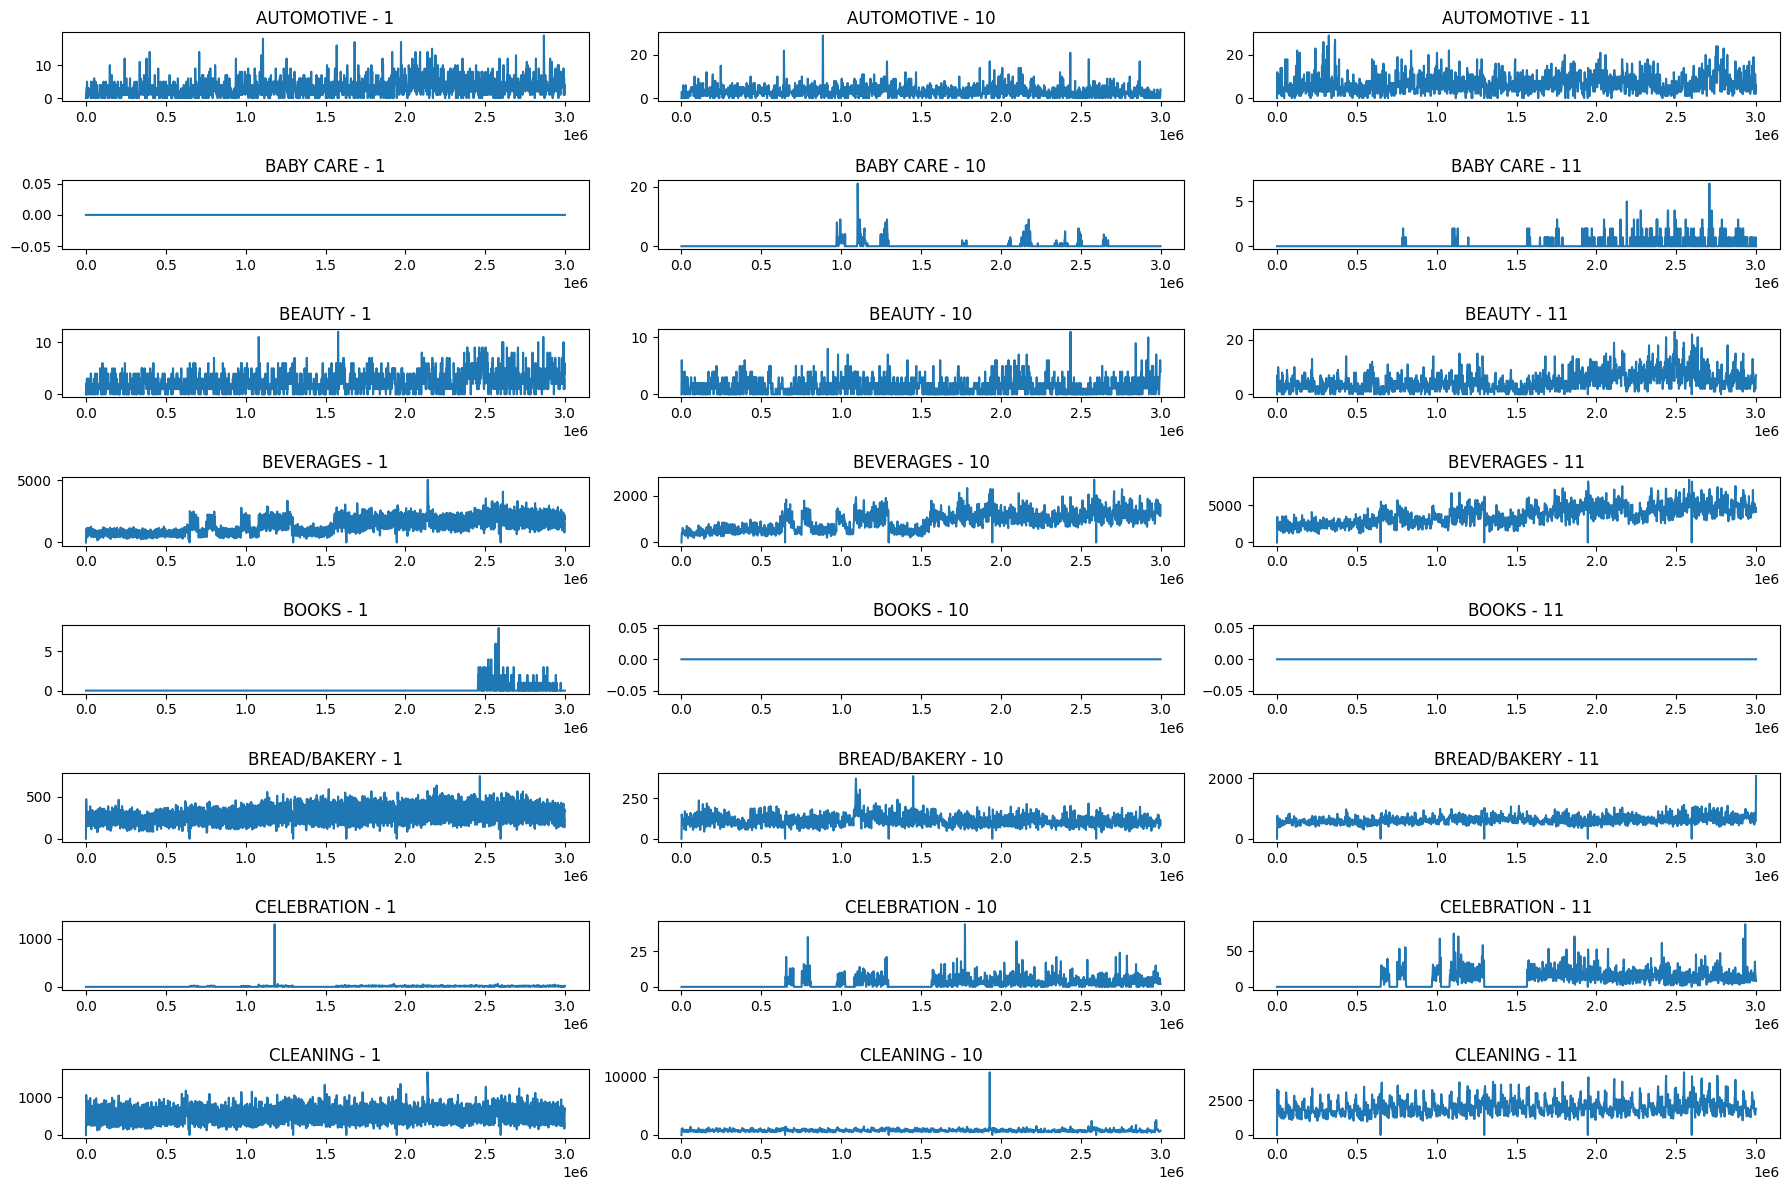

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(8, 3, figsize=(18,12))

for i in range(8):
    for j in range(3):
        ax = axs[i][j]
        ax.set_title(f'{df.family.unique()[i]} - {df.store_nbr.unique()[j]}')
        ax.plot(df[(df.family == df.family.unique()[i]) & (df.store_nbr == df.store_nbr.unique()[j])].sales)

plt.tight_layout()

### Preprocessing Data

In [11]:
df['store_family'] = df.apply(lambda x: f"{x['store_nbr']}_{x['family']}", axis=1)

In [12]:
df.head()

,date,store_nbr,family,sales,store_family
0,2013-01-01,1,AUTOMOTIVE,0.0,1_AUTOMOTIVE
1,2013-01-01,1,BABY CARE,0.0,1_BABY CARE
2,2013-01-01,1,BEAUTY,0.0,1_BEAUTY
3,2013-01-01,1,BEVERAGES,0.0,1_BEVERAGES
4,2013-01-01,1,BOOKS,0.0,1_BOOKS


In [13]:
df_pivoted = df.pivot(index='date', columns='store_family', values='sales')

In [14]:
df_pivoted

store_family,10_AUTOMOTIVE,10_BABY CARE,10_BEAUTY,10_BEVERAGES,10_BOOKS,10_BREAD/BAKERY,10_CELEBRATION,10_CLEANING,10_DAIRY,10_DELI,...,9_MAGAZINES,9_MEATS,9_PERSONAL CARE,9_PET SUPPLIES,9_PLAYERS AND ELECTRONICS,9_POULTRY,9_PREPARED FOODS,9_PRODUCE,9_SCHOOL AND OFFICE SUPPLIES,9_SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.00000,0.000,0.0,0.000000
2013-01-02,3.0,0.0,6.0,396.0,0.0,151.0,0.0,1110.0,101.0,276.0,...,0.0,374.531,482.0,0.0,0.0,651.292,83.00000,0.000,0.0,29.214000
2013-01-03,2.0,0.0,3.0,399.0,0.0,129.0,0.0,970.0,113.0,269.0,...,0.0,400.863,372.0,0.0,0.0,509.496,66.00000,0.000,0.0,25.000000
2013-01-04,2.0,0.0,4.0,460.0,0.0,105.0,0.0,669.0,66.0,92.0,...,0.0,310.878,324.0,0.0,0.0,332.672,57.00000,0.000,0.0,11.000000
2013-01-05,0.0,0.0,3.0,624.0,0.0,112.0,0.0,1093.0,88.0,194.0,...,0.0,447.685,461.0,0.0,0.0,510.919,84.00000,0.000,0.0,28.361000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,2.0,0.0,2.0,1459.0,0.0,76.0,5.0,532.0,251.0,269.0,...,5.0,309.245,373.0,11.0,2.0,525.224,112.10000,1453.078,140.0,23.831000
2017-08-12,2.0,0.0,3.0,1332.0,0.0,113.0,5.0,676.0,255.0,276.0,...,2.0,260.298,400.0,7.0,10.0,383.387,129.90399,1419.264,138.0,16.859001
2017-08-13,0.0,0.0,5.0,1526.0,0.0,119.0,6.0,670.0,270.0,251.0,...,3.0,327.206,510.0,2.0,9.0,412.458,105.16900,1693.607,200.0,20.000000


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_size = int(0.8 * len(df_pivoted))
train_data = df_pivoted.iloc[:train_size]
test_data = df_pivoted.iloc[train_size:]

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [16]:
import numpy as np

def create_X_y(data, input_length, output_length):
    X, y = [], []

    for i in range(len(data) - input_length - output_length + 1):
        X.append(data[i:i+input_length])
        y.append(data[i+input_length:i+input_length+output_length])

    return np.array(X), np.array(y)

In [17]:
X_train, y_train = create_X_y(train_data_scaled, 120, 16)
X_test, y_test = create_X_y(test_data_scaled, 120, 16)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1212, 120, 1782) (1212, 16, 1782)
(202, 120, 1782) (202, 16, 1782)


In [19]:
import torch

X_train_tensor = torch.FloatTensor(X_train).cuda()
y_train_tensor = torch.FloatTensor(y_train).cuda()
X_test_tensor = torch.FloatTensor(X_test).cuda()
y_test_tensor = torch.FloatTensor(y_test).cuda()

In [20]:
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

### Build & Train Model

In [47]:
import torch.nn as nn
import torch.nn.functional as F

class TCNModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv1d(33*54, 64, kernel_size=3, padding=2, dilation=1)  # num_families * num_stores
        self.conv2 = nn.Conv1d(64, 64, kernel_size=3, padding=4, dilation=2) # dilation animated here: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
        self.conv3 = nn.Conv1d(64, 64, kernel_size=3, padding=8, dilation=4) # essential idea: longer temporal window without increasing kernel size or depth

        self.fc = nn.Linear(64, 33*54*16)  # num_families * num_stores * num_days_to_predict
 
    def forward(self, x):
        x = x.transpose(1, 2)  # swaps 2nd and 3rd dimension
        x = F.relu(self.conv1(x)[:, :, :-2])  # Here we remove the extra padded positions
        x = F.relu(self.conv2(x)[:, :, :-4])  # Gives us same temporal length as input
        x = F.relu(self.conv3(x)[:, :, :-8])
        
        return self.fc(x[:,:,-1]).view(-1, 16, 33*54)  # reshapes (batch_size, 33*54*16) to (batch size, 16, 33*54) (-1 means infer automatically)

In [22]:
model = TCNModel().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [23]:
for epoch in range(30):
    model.train()
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        y_pred = model(X_batch)

        loss = torch.sqrt(criterion(y_pred, y_batch))
        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()

    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss/len(train_loader)}')

Epoch 5, Loss: 0.7910686919563695
Epoch 10, Loss: 0.7466946416779568
Epoch 15, Loss: 0.7252928175424275
Epoch 20, Loss: 0.7118984037324002
Epoch 25, Loss: 0.7040935237156717
Epoch 30, Loss: 0.6973358957391036


### Evaluate Model

In [24]:
model.eval()

with torch.no_grad():
    test_pred = model(X_test_tensor)
    test_loss = torch.sqrt(criterion(test_pred, y_test_tensor))
    print(f'Test loss: {test_loss.item()}')

Test loss: 172.24440002441406


In [30]:
print("Train batch y:", y_batch.min().item(), y_batch.max().item())
print("Test y:", y_test_tensor.min().item(), y_test_tensor.max().item())
print("Train batch y:", y_batch.median().item(), y_batch.mean().item())
print("Test y:", y_test_tensor.median().item(), y_test_tensor.mean().item())
print("Train batch y:", y_batch.quantile(0.99).item(), y_batch.quantile(0.99).item())
print("Test y:", y_test_tensor.quantile(0.99).item(), y_test_tensor.quantile(0.99).item())

Train batch y: -6.216256141662598 35.34794616699219
Test y: -3.338263750076294 10462.0
Train batch y: -0.07538429647684097 0.10055681318044662
Test y: 0.34021660685539246 7.690605163574219
Train batch y: 3.2313642501831055 3.2313642501831055
Test y: 10.665324211120605 10.665324211120605


### Train on Full Dataset & Make Predictions

In [34]:
full_data_scaled = scaler.fit_transform(df_pivoted)

X_full, y_full = create_X_y(full_data_scaled, 120, 16)

X_full_tensor = torch.FloatTensor(X_full).cuda()
y_full_tensor = torch.FloatTensor(y_full).cuda()

full_dataset = TensorDataset(X_full_tensor, y_full_tensor)
full_loader = DataLoader(full_dataset, batch_size=32, shuffle=True)

final_model = TCNModel().cuda()
optimizer = torch.optim.Adam(final_model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [35]:
for epoch in range(30):
    final_model.train()
    epoch_loss = 0

    for X_batch, y_batch in full_loader:
        optimizer.zero_grad()

        y_pred = final_model(X_batch)

        loss = torch.sqrt(criterion(y_pred, y_batch))
        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()

    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss/len(full_loader)}')

Epoch 5, Loss: 0.7894283387125755
Epoch 10, Loss: 0.7417931872971204
Epoch 15, Loss: 0.7246840450228477
Epoch 20, Loss: 0.7134359904697963
Epoch 25, Loss: 0.7035929207899132
Epoch 30, Loss: 0.6971172666063115


In [46]:
final_model.eval()

with torch.no_grad():
    last_sequence = torch.FloatTensor(full_data_scaled[-120:]).unsqueeze(0).cuda()
    predictions = final_model(last_sequence)

predictions = predictions.cpu().numpy().squeeze(0)
predictions = scaler.inverse_transform(predictions)
predictions = np.maximum(predictions, 0) # Clip negative sales to 0

test_df = pd.read_csv('data/test.csv')
test_df['store_family'] = test_df['store_nbr'].astype(str) + '_' + test_df['family']
dates = sorted(test_df['date'].unique())

pred_df = pd.DataFrame(predictions, index=dates, columns=df_pivoted.columns)

pred_long = pred_df.stack().reset_index()  # opposite of pivot basically
pred_long.columns = ['date', 'store_family', 'sales']

submission = test_df.merge(pred_long, on=['date', 'store_family'], how='left')[['id', 'sales']]
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv
